<a href="https://colab.research.google.com/github/tonyyoon123/MachineLearning/blob/master/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libaries 

In [0]:
import matplotlib.pyplot as plt
import numpy as np

*Input Data*

In [0]:
file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images


# make a matrix each column of which represents an images in a vector form 

list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

new_total = np.zeros((10, size_row *size_col))          #new array with all zeros with 
new_count = np.zeros((10))
new_labels = np.zeros((10))

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

for i in range(count):
    
    label = list_label[i]
    im_vector = list_image[:, i]

    new_total[label] = new_total[label] + im_vector
    new_count[label] = new_count[label] + 1


**Sigmoid Function**

In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

**100/10000 images**

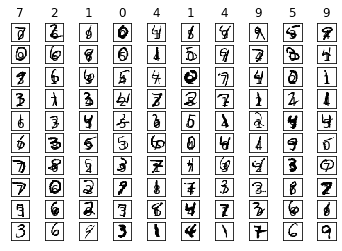

In [128]:
f1 = plt.figure(1)
for i in range(100):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 10, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# 1. Plot the average image

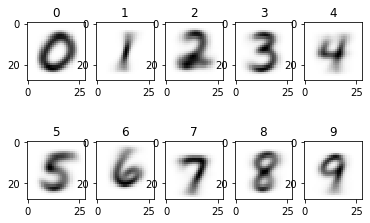

In [150]:
for i in range(10):
        im_vector =  new_total[i]/new_count[i]         #getting the average value
        im_matrix = im_vector.reshape((28, 28))      #reshape it to the size of rows and coumns 

        plt.subplot(2,5,i+1)       #plot the labels of 2 rows and 5 columns
        plt.title(i)               #label the number 
        plt.imshow(im_matrix, cmap='Greys', interpolation='None')   
plt.show()

# 2. Present the output of the neural network with random weights 